In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def euler_ex(f, a, b, y0, n):
    #n é o número de sub-espaços (n = (b-a)/h)
    #h é o espaçamento
    h = (b-a)/n
    y = np.zeros(n+1) #n sub-espaços -> n+1 soluções (vetor para armazenar as soluções)
    y[0] = y0
    for i in range(n):
        xi = a + h*i
        y[i+1] = y[i] + h * f(xi, y[i])
    return y

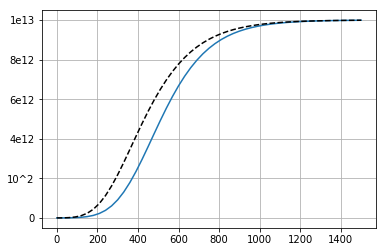

In [4]:
f = lambda t, N: 0.006 * N * np.log(10**13/N)
exata = lambda t: 10**13 * np.exp(-4 * np.exp(-0.006 * t) * np.log(10))
a = 0
b = 1500
n = 50
N0 = 10**9
N = euler_ex(f, a, b, N0, n)
t = np.linspace(0, 1500, 51)

plt.plot(t, N)
plt.plot(t, exata(t), 'k--')
plt.yticks([0, 2e12, 4e12, 6e12, 8e12, 1e13], ['0', '10^2', '4e12', '6e12', '8e12', '1e13'])
plt.grid()

In [5]:
#Um jeito de diminuir essa diferença seria aumentar o número de sub-espaços (diminui o h). Isso também aumentaria o número de cálculos.

In [6]:
def euler_im1(a, b, y0, n): #não é genérico como a explícita, é específica para o problema do slide 12
    #n é o número de sub-espaços (n = (b-a)/h)
    #h é o espaçamento
    h = (b-a)/n
    y = np.zeros(n+1) #n sub-espaços -> n+1 soluções (vetor para armazenar as soluções)
    y[0] = y0
    for i in range(n):
        xi = a + h*i
        y[i+1] = (y[i] + h*(xi + h))/(1 + h)
    return y

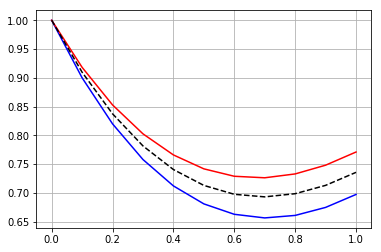

In [8]:
f2 = lambda x, y: -y + x
exata2 = lambda x: x - 1 + 2 * np.exp(-x)
a = 0
b = 1
n = 10
y0 = 1

y_ex = euler_ex(f2, a, b, y0, n)
y_im = euler_im1(a, b, y0, n)
x = np.linspace(a, b, n+1)

plt.plot(x, y_ex, 'b')
plt.plot(x, y_im, 'r')
plt.plot(x, exata2(x), 'k--')
plt.grid()

In [18]:
#Nesse caso, f é linear em y.
#Na atividade, iremos implementar para o modelo SIR, onde deve ser conhecido algumas constantes.
#A "sacada" é criar função que combine a saida de uma EDO com a entrada de outra EDO.